1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [1]:
import pandas as pd

file_path = 'D:/open_rank_20236.csv'
df = pd.read_csv(file_path)

top_100 = df.sort_values('rank').head(100)

max_value = top_100['value'].max()
min_value = top_100['value'].min()
mean_value = top_100['value'].mean()
median_value = top_100['value'].median()

print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"平均值: {mean_value:.2f}")  
print(f"中位数: {median_value:.2f}")  

最大值: 1394.45
最小值: 200.68
平均值: 346.97
中位数: 273.67


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [3]:
import pandas as pd

file_path = 'D:/activity_2022.csv'
activity_data = pd.read_csv(file_path)

growth_rate_columns = []
for i in range(2, 13):
    prev_col = f'2022{i-1}_value'
    curr_col = f'2022{i}_value'
    growth_rate_col = f'growth_rate_{i}'
    activity_data[growth_rate_col] = (activity_data[curr_col] - activity_data[prev_col]) / activity_data[prev_col] * 100
    growth_rate_columns.append(growth_rate_col)

activity_data['average_growth_rate'] = activity_data[growth_rate_columns].mean(axis=1)

activity_data_sorted = activity_data.sort_values(by='202212_value', ascending=False).head(10)

top_10_average_growth_rate = activity_data_sorted['average_growth_rate'].mean()

print(f"美国排名前十的项目在2022年的平均增长率为: {top_10_average_growth_rate:.2f}%")

美国排名前十的项目在2022年的平均增长率为: 1.25%


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

中国开源领域排名前十企业的统计指标:
        issue_comment    open_issue     open_pull  review_comment  \
mean     61205.500000   9169.200000  16912.700000     19857.50000   
median   39141.000000   6889.500000  15953.000000     10851.00000   
std      49332.487917   6810.653563  10068.922805     21115.07349   
min      11741.000000    752.000000   1823.000000      2113.00000   
max     167814.000000  22397.000000  35266.000000     60402.00000   

         merged_pull         value  rankDelta    valueDelta  
mean    13764.100000   40269.53400   5.300000   9265.007000  
median  13705.500000   29789.23500   0.000000   9882.000000  
std      7692.752064   30905.17181   9.944848   5327.824003  
min      1165.000000   12033.71000   0.000000   2329.360000  
max     26732.000000  103368.49000  25.000000  21093.110000  

全球开源领域排名前十企业的统计指标:
        issue_comment     open_issue      open_pull  review_comment  \
mean     3.414094e+05   43300.200000   83423.000000   120392.100000   
median   1.786290e+05   21648.00

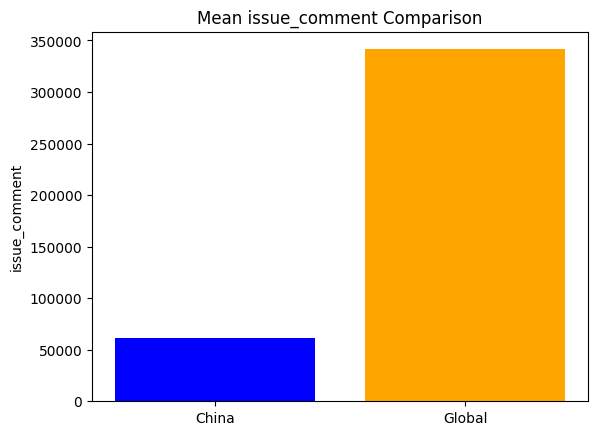

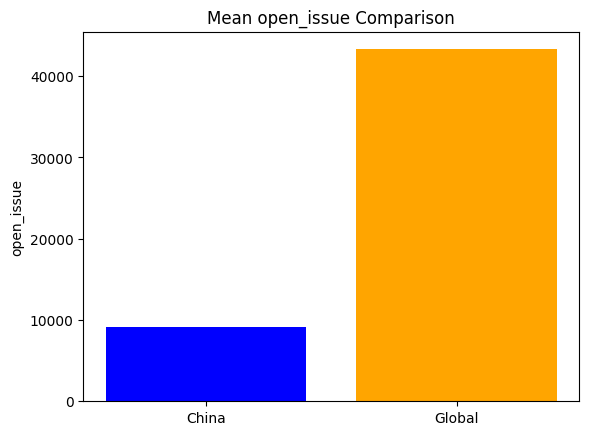

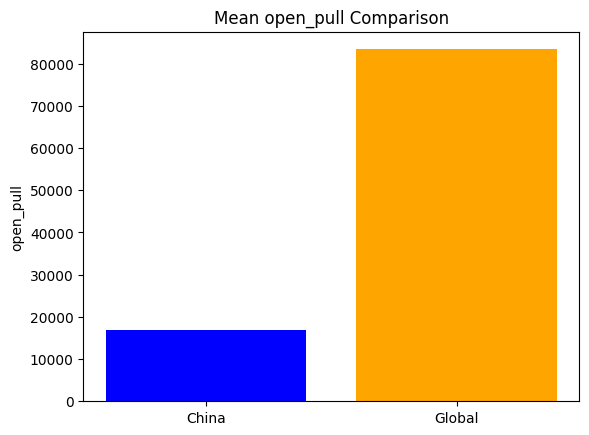

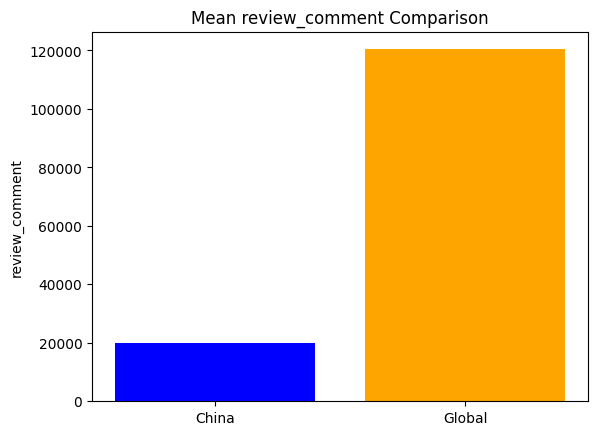

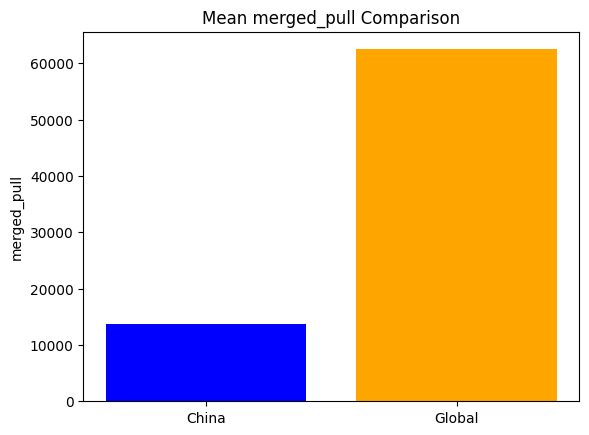

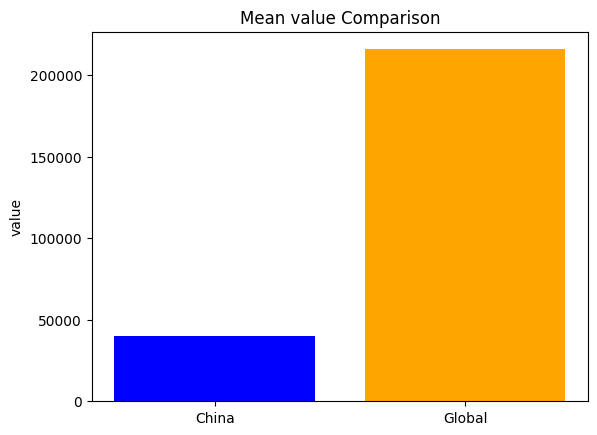

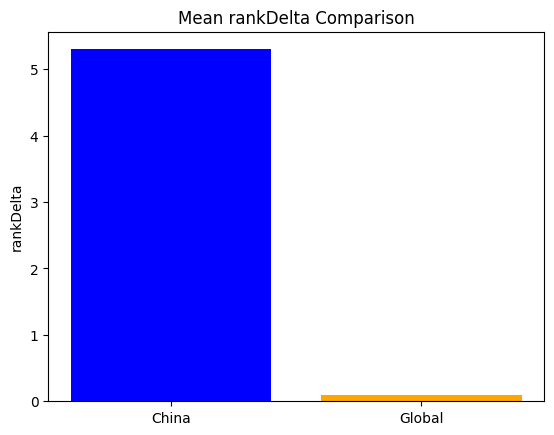

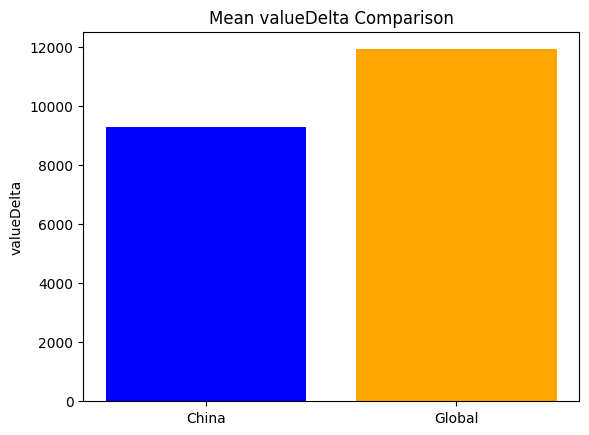

In [6]:
import pandas as pd

china_file_path = 'D:/china_2022.csv'
global_file_path = 'D:/global_2022.csv'

china_data = pd.read_csv(china_file_path)
global_data = pd.read_csv(global_file_path)

def calculate_statistics(data, metrics):
    return data[metrics].agg(['mean', 'median', 'std', 'min', 'max'])

metrics = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value', 'rankDelta', 'valueDelta']

china_stats = calculate_statistics(china_data, metrics)
global_stats = calculate_statistics(global_data, metrics)

print("中国开源领域排名前十企业的统计指标:")
print(china_stats)
print("\n全球开源领域排名前十企业的统计指标:")
print(global_stats)

import matplotlib.pyplot as plt

for metric in metrics:
    fig, ax = plt.subplots()
    ax.bar(['China', 'Global'], [china_stats.loc['mean', metric], global_stats.loc['mean', metric]], color=['blue', 'orange'])
    ax.set_title(f'Mean {metric} Comparison')
    ax.set_ylabel(metric)
    plt.show()


4.贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [10]:
P_A = 0.25  
P_B_given_A = 0.85  
P_not_A = 0.75  
P_B_given_not_A = 0.10  

P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"已知一个项目带有 HTML/Markdown 标签的情况下，该项目是非软件型项目的概率是: {P_A_given_B:.4f}")

已知一个项目带有 HTML/Markdown 标签的情况下，该项目是非软件型项目的概率是: 0.7391


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [11]:
P_JS_given_Tool = 0.35  
P_Tool = 0.50  
P_JS_given_not_Tool = 0.10  
P_not_Tool = 0.50 

P_JS = (P_JS_given_Tool * P_Tool) + (P_JS_given_not_Tool * P_not_Tool)

P_Tool_given_JS = (P_JS_given_Tool * P_Tool) / P_JS

print(f"已知一个项目是由 JavaScript 语言编写的情况下，它是工具组件型项目的概率是: {P_Tool_given_JS:.4f}")

已知一个项目是由 JavaScript 语言编写的情况下，它是工具组件型项目的概率是: 0.7778


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

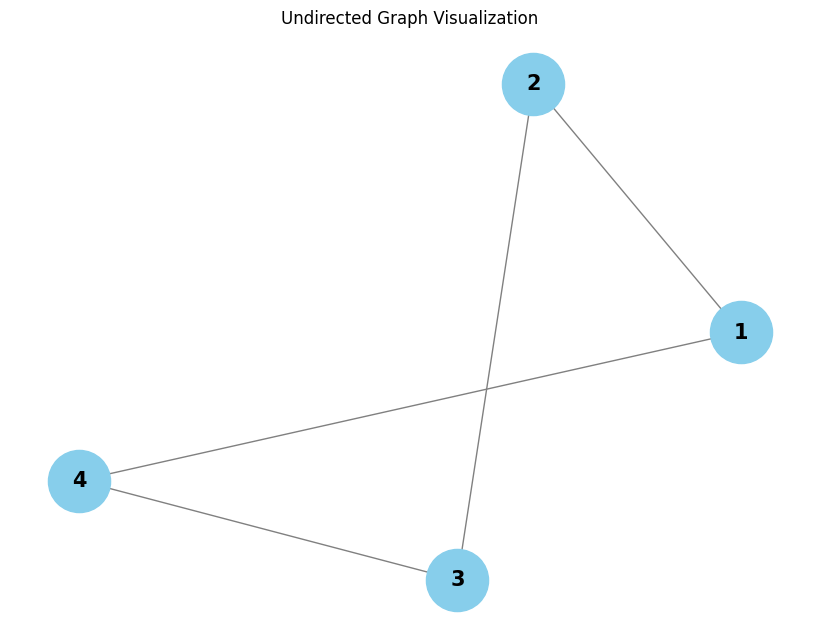

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()

G.add_nodes_from(user)

G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('Undirected Graph Visualization')
plt.show()

7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

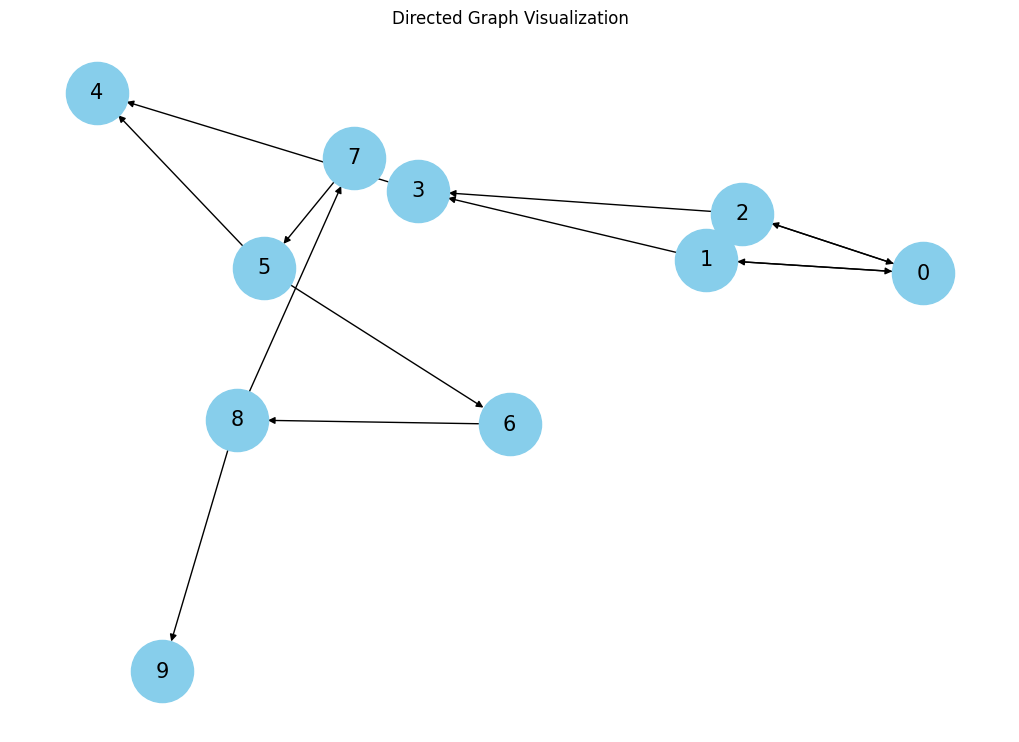

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), 
         (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', font_size=15, arrows=True)
plt.title("Directed Graph Visualization")
plt.show()

8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


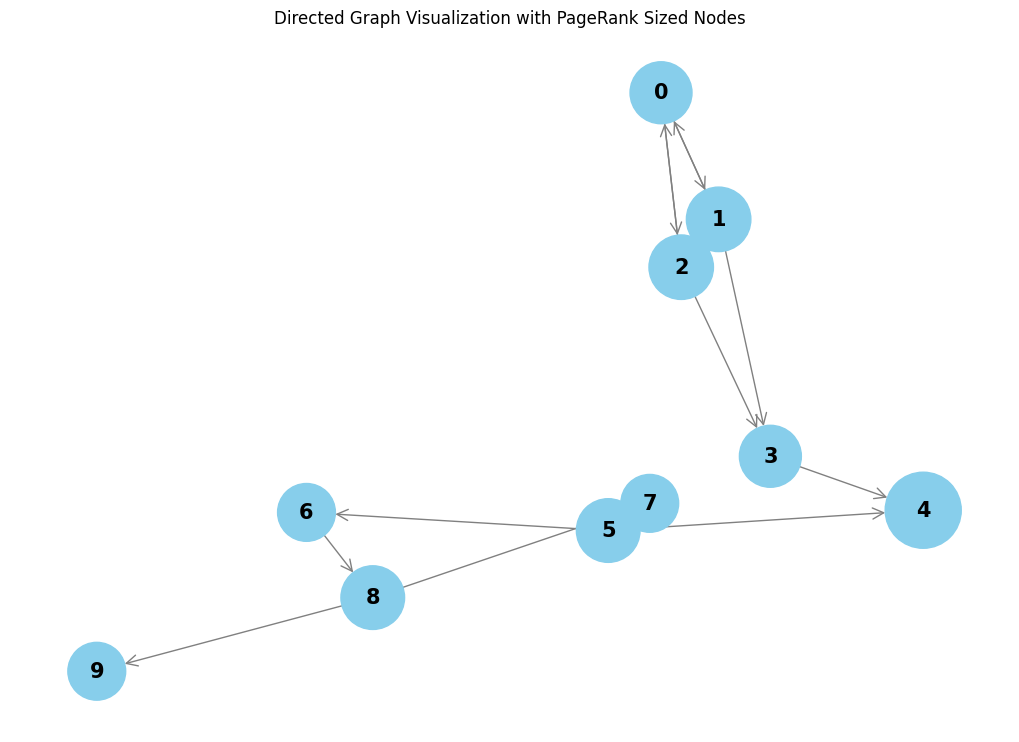

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), 
         (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank = nx.pagerank(G)

for node, pr in pagerank.items():
    print(f'Node {node}: PageRank = {pr:.4f}')

min_size, max_size = 500, 3000
sizes = [min_size + (max_size - min_size) * pr / max(pagerank.values()) for pr in pagerank.values()]

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=sizes, edge_color='gray', width=1.0, arrowsize=20, arrowstyle='->')
nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold')
plt.title("Directed Graph Visualization with PageRank Sized Nodes")
plt.show()